### Machine Learning com Scikit-Learn

Problema de negócio

Usando dados históricos é possível prever o salário de alguém com base no tempo dedicado aos estudos em horas por mês ?

In [ ]:
#Carregando a versão do python
from platform import python_version
print('Versão do python: ', python_version())

In [1]:
#Importações
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

/home/allvjr/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/allvjr/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Carregando os dados

In [2]:
#Carregando o dataset
df_dsa = pd.read_csv('dataset.csv')

In [5]:
df_dsa.shape

(500, 2)

In [6]:
df_dsa.columns

Index(['horas_estudo_mes', 'salario'], dtype='object')

In [7]:
df_dsa.head()

,horas_estudo_mes,salario
0,57.0,6813.0
1,48.0,6855.0
2,60.0,5801.0
3,73.0,7431.0
4,46.0,5475.0


In [10]:
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   horas_estudo_mes  500 non-null    float64
 1   salario           500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


### Análise Exploratória

In [8]:
# Verifica se há valores ausentes
df_dsa.isnull().sum()

horas_estudo_mes    0
salario             0
dtype: int64

In [9]:
#Correção
df_dsa.corr()

,horas_estudo_mes,salario
horas_estudo_mes,1.000000,0.818576
salario,0.818576,1.000000


In [11]:
# Resumo estatístico
df_dsa.describe()

,horas_estudo_mes,salario
count,500.000000,500.000000
mean,50.060000,6018.930000
std,14.659406,848.697853
min,1.000000,3664.000000
25%,39.750000,5473.000000
50%,50.000000,6013.500000
75%,60.000000,6542.000000
max,100.000000,9348.000000


<Axes: xlabel='horas_estudo_mes', ylabel='Count'>

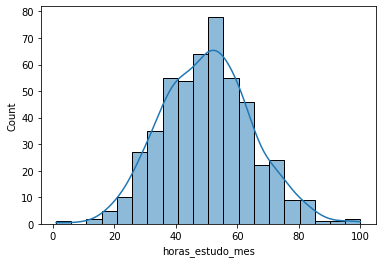

In [14]:
#Histograma da variável preditora
sns.histplot(data = df_dsa, x = 'horas_estudo_mes', kde = True)

### Preparando os dados

In [4]:
# Prepara a variável de entrada X
X = np.array(df_dsa['horas_estudo_mes'])

In [5]:
type(X)

numpy.ndarray

In [6]:
# Ajusta o share de X
X = X.reshape(-1, 1)

In [7]:
# Prepara a variável alvo
y = df_dsa['salario']

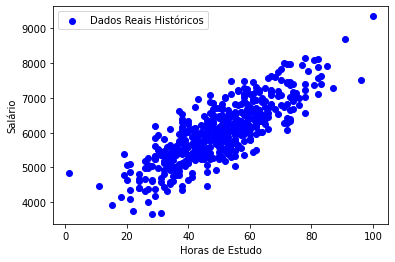

In [8]:
# Gráfico de dispersão entre X e y
plt.scatter(X, y, color = 'blue', label = 'Dados Reais Históricos')
plt.xlabel('Horas de Estudo')
plt.ylabel('Salário')
plt.legend()
plt.show()

In [9]:
#Dividir dados em treinamento e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [10]:
X_treino.shape

(400, 1)

In [11]:
X_teste.shape

(100, 1)

In [12]:
y_treino.shape

(400,)

In [13]:
y_teste.shape

(100,)

###Modelagem Preditiva (Machine Learning)
https://scikit-learn.org/stable/modiles/generated/sklearn.linear_model.LinearRegression.html

In [14]:
# Cria o modelo de regressão linear simples
modelo = LinearRegression()

In [15]:
#Treina o modelo
modelo.fit(X_treino, y_treino)

LinearRegression()

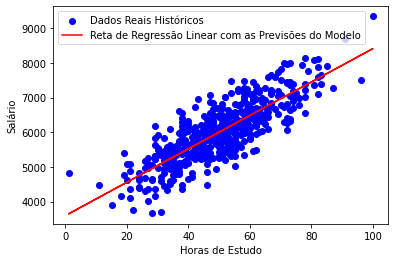

In [17]:
# Visualiza a reta de regressão linear (previsões) e os dados reais usados no treiono
plt.scatter(X, y, color = 'blue', label = 'Dados Reais Históricos')
plt.plot(X, modelo.predict(X), color = 'red', label = 'Reta de Regressão Linear com as Previsões do Modelo')
plt.xlabel("Horas de Estudo")
plt.ylabel('Salário')
plt.legend()
plt.show()

In [20]:
#Avalia o modelo nos dados de teste
score = modelo.score(X_teste, y_teste)
print(f"Coeficinente R²: {score:.2f}")

Coeficinente R²: 0.59


In [21]:
#Intercept - Parâmetro w0
modelo.intercept_

3596.7837243727545